<a href="https://colab.research.google.com/github/jeffj9930/3D_MRI_medical_imaging/blob/master/Copy_of_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
#image = nib.load("/home/jeff/Documents/ml_files/medical_imaging/small/t1/IXI102-HH-1416-T1_fcm.nii.gz")


Mounted at /content/gdrive


# New Section

In [7]:
import os
import random
from random import randint
import numpy as np
import torch
import torchvision
import nibabel as nib
import matplotlib.pyplot as plt
from glob import glob
import sys
%matplotlib inline

root_dir = "/content/gdrive/My Drive/"
image_dir = os.path.join(root_dir,'ml_files/medical_imaging/small/')
t1_dir = os.path.join(image_dir, 't1')
t2_dir = os.path.join(image_dir, 't2')
t1_images = glob(os.path.join(t1_dir,'*.nii.gz'))
t2_images = glob(os.path.join(t2_dir,'*.nii.gz'))
assert len(t1_images) == len(t2_images) and len(t1_images) != 0

In [8]:
seed = 22
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

In [81]:
rand_patient = randint(0,len(t1_images))
imvol_t1 = nib.load(t1_images[rand_patient]).get_fdata()
imvol_t2 = nib.load(t2_images[rand_patient]).get_fdata()

In [82]:
rand_slice = randint(0,len(imvol_t1[1,:,1]))
print("Number of slices: {}".format(len(imvol_t1[1,:,1])))

Number of slices: 120


In [83]:
print("Patient CT Images Shape: {}".format(imvol_t1.shape))
slice_t1 = imvol_t1[:,rand_slice,:]
print(slice_t1)
print("Shape of Slice: {}".format(slice_t1.shape))
print("Slice's min and max: {:.4f} : {:.4f}".format(slice_t1.min(),slice_t1.max()))

Patient CT Images Shape: (120, 120, 90)
[[-3.43658002e-19  1.15107479e-12 -9.81074336e-12 ...  5.73637478e-15
  -7.42996337e-16  2.86740704e-17]
 [ 1.81651178e-12 -1.81004793e-06  1.48511808e-05 ...  6.69439659e-09
  -5.57152824e-10  2.16974615e-11]
 [ 1.16356806e-10 -6.23777232e-05  5.24420291e-04 ...  2.01378583e-07
  -1.42932608e-08  5.57588864e-10]
 ...
 [-2.50782534e-07 -4.81732313e-05  4.80605551e-04 ... -9.55524956e-06
   1.90505543e-05  2.19424305e-06]
 [-3.90062240e-08 -2.72911711e-05 -1.29877459e-04 ...  6.92322574e-05
   7.01935671e-04  7.17355797e-05]
 [ 2.50929721e-09  2.75496404e-06  6.18603690e-06 ...  2.15126711e-05
   8.41470137e-06  7.93112122e-07]]
Shape of Slice: (120, 90)
Slice's min and max: -0.0005 : 1.3931


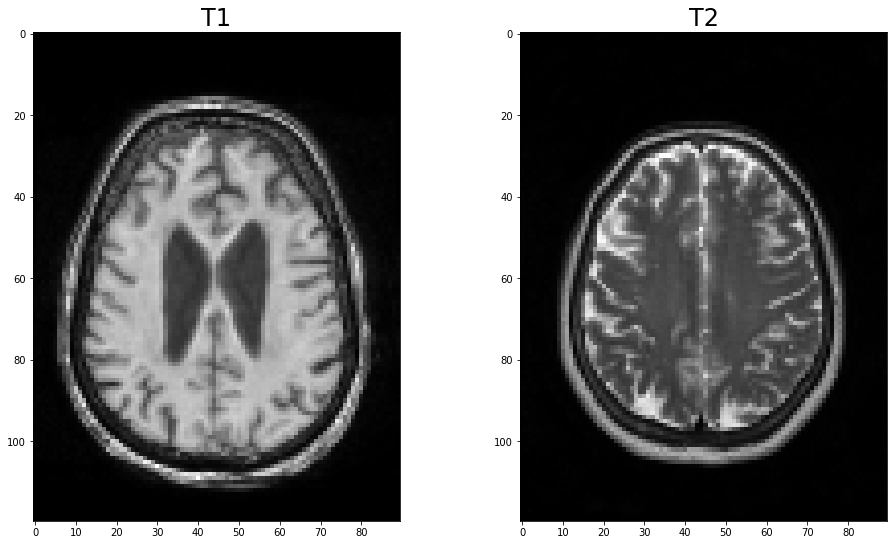

In [84]:

fig, axes = plt.subplots(1,2,figsize=(16,9))
axes[0].imshow(imvol_t1[:,rand_slice,:],cmap='gray');axes[0].set_title('T1',fontsize=24)
axes[1].imshow(imvol_t2[:,rand_slice,:],cmap='gray');axes[1].set_title('T2',fontsize=24)
plt.show()

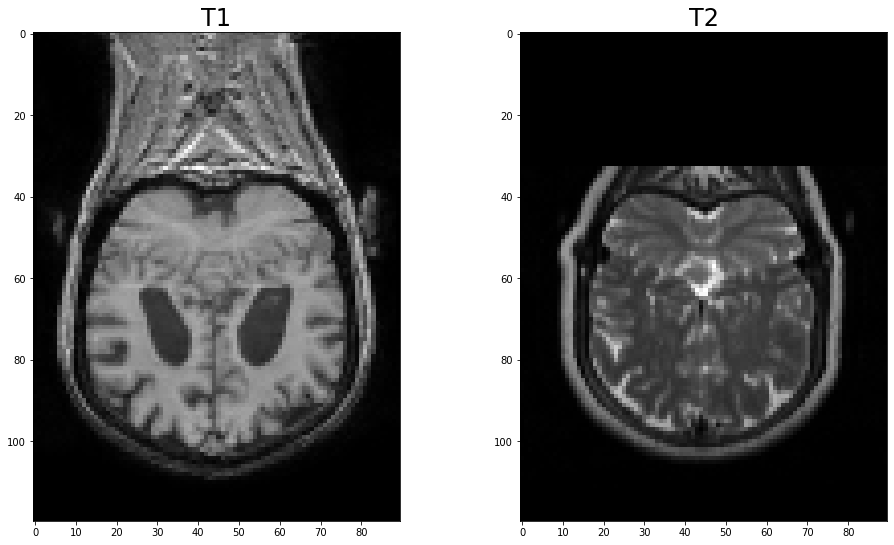

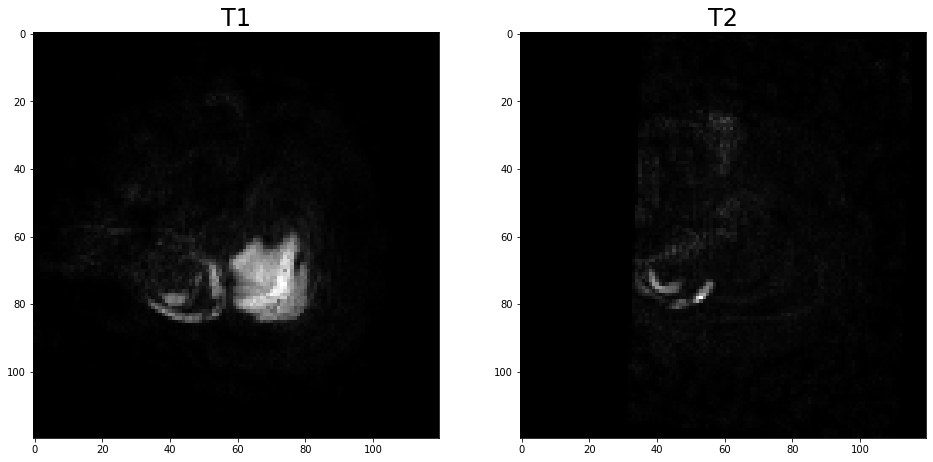

In [85]:
fig, axes = plt.subplots(1,2,figsize=(16,9))
axes[0].imshow(imvol_t1[rand_slice,:,:],cmap='gray');axes[0].set_title('T1',fontsize=24)
axes[1].imshow(imvol_t2[rand_slice,:,:],cmap='gray');axes[1].set_title('T2',fontsize=24)
plt.show()
fig, axes = plt.subplots(1,2,figsize=(16,9))
axes[0].imshow(imvol_t1[:,:,rand_slice],cmap='gray');axes[0].set_title('T1',fontsize=24)
axes[1].imshow(imvol_t2[:,:,rand_slice],cmap='gray');axes[1].set_title('T2',fontsize=24)
plt.show()

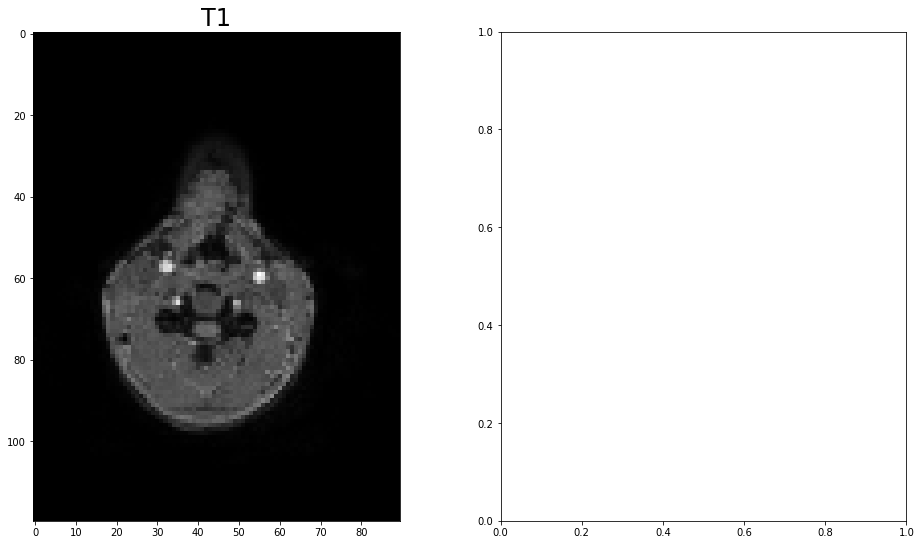

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [43]:
from matplotlib.pyplot import draw, pause
fig, axes = plt.subplots(1,2,figsize=(16,9))
for idx in range(0,10):
  slices1[idx] = image_t1[:,idx,:]
h = axes[0].imshow(slices1[0],cmap='gray')
axes[0].set_title('T1',fontsize=24)
#slices2 = [axes[1].imshow(image_t2[:,idx,:],cmap='gray') for idx in range(0,10)]
#axes[1].set_title('T2',fontsize=24)

for sl1 in slices1:
  h.set_data(sl1)
  draw();pause(2)
  #plt.show()

In [86]:
print("Shape of Slice: {}".format(imvol_t1.shape[2]))


Shape of Slice: 90
